In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
 
 

In [4]:
# Reading the dataset
def read_dataset():
    df = pd.read_csv("C:\\Users\\raprabhu\\Downloads\\bank_note_data.csv")
    # print(len(df.columns))
    X = df[df.columns[0:4]].values
    y = df[df.columns[4]]
 
    # Encode the dependent variable
    Y = one_hot_encode(y)
    print(X.shape)
    return (X, Y)


(1372, 4)
(1097, 4)
(1097, 2)
(275, 4)
n_dim 4
epoch :  0  -  cost:  0.6561239  - MSE:  0.6937453559504378 - Train Accuracy:  0.6773017
epoch :  1  -  cost:  0.63247424  - MSE:  0.6477338137930793 - Train Accuracy:  0.7055606
epoch :  2  -  cost:  0.61533153  - MSE:  0.6151129113211474 - Train Accuracy:  0.7247037
epoch :  3  -  cost:  0.6020209  - MSE:  0.5890026858004733 - Train Accuracy:  0.7301732
epoch :  4  -  cost:  0.5889818  - MSE:  0.5629819104033179 - Train Accuracy:  0.68732905
epoch :  5  -  cost:  0.5744173  - MSE:  0.5363181876451582 - Train Accuracy:  0.7465816
epoch :  6  -  cost:  0.5572  - MSE:  0.5076353268884444 - Train Accuracy:  0.76754785
epoch :  7  -  cost:  0.53816664  - MSE:  0.4793350711247822 - Train Accuracy:  0.8021878
epoch :  8  -  cost:  0.5184447  - MSE:  0.4540364711648066 - Train Accuracy:  0.8422972
epoch :  9  -  cost:  0.49856052  - MSE:  0.42876664010887217 - Train Accuracy:  0.8559708
epoch :  10  -  cost:  0.4761934  - MSE:  0.400166697750954

epoch :  93  -  cost:  0.036424153  - MSE:  1.640939948876806 - Train Accuracy:  1.0
epoch :  94  -  cost:  0.03598586  - MSE:  1.6542972178473003 - Train Accuracy:  1.0
epoch :  95  -  cost:  0.03555134  - MSE:  1.6696996664278982 - Train Accuracy:  1.0
epoch :  96  -  cost:  0.03513445  - MSE:  1.6828256103766392 - Train Accuracy:  1.0
epoch :  97  -  cost:  0.03471978  - MSE:  1.6979768893201992 - Train Accuracy:  1.0
epoch :  98  -  cost:  0.03431993  - MSE:  1.7124213753374753 - Train Accuracy:  1.0
epoch :  99  -  cost:  0.03392913  - MSE:  1.7249789296669802 - Train Accuracy:  1.0
Model saved in file: C:\Users\raprabhu\Downloads\BankNotes


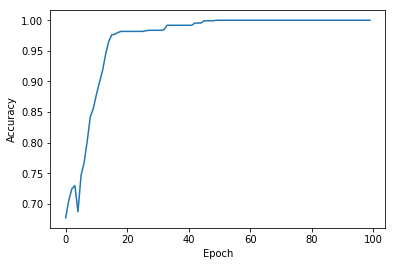

Test Accuracy:  1.0
MSE: 1.7250


In [90]:
# Define the encoder function.
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode
 
 
# Read the dataset
X, Y = read_dataset()
 
# Shuffle the dataset to mix up the rows.
X, Y = shuffle(X, Y, random_state=1)
 
# Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)
 
# Inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
 
# Define the important parameters and variable to work with the tensors
learning_rate = 0.3
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = "C:\\Users\\raprabhu\\Downloads\\BankNotes"
 
# Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 4
n_hidden_2 = 4
n_hidden_3 = 4
n_hidden_4 = 4
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
 
# Define the model
def multilayer_perceptron(x, weights, biases):
 
    # Hidden layer with RELU activationsd
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    # Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    # Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
 
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer
 
 
# Define the weights and the biases for each layer
 
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 
# Initialize all the variables
 
init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
# Call your model defined
y = multilayer_perceptron(x, weights, biases)
 
# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
# Calculate the cost and the accuracy for each epoch
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
 
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)
 
#Plot Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
# Print the final accuracy
 
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
# Print the final mean square error
 
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

In [91]:
prediction=tf.argmax(y,1)
correct_prediction=tf.equal(prediction, tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

for  i in range(754,758):
    prediction_run=sess.run(prediction,feed_dict={x:X[i].reshape(1,4)}) 
    accuracy_run=sess.run(accuracy,feed_dict={x:X[i].reshape(1,4)}) 
    print("original class:" , i )

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_3' with dtype float and shape [?,2]
	 [[node Placeholder_3 (defined at <ipython-input-90-acd8a330afe1>:42) ]]

Caused by op 'Placeholder_3', defined at:
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 528, in run_forever
    self._run_once()
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 1764, in _run_once
    handle._run()
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-90-acd8a330afe1>", line 42, in <module>
    y_ = tf.placeholder(tf.float32, [None, n_class])
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2077, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6833, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\Users\raprabhu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_3' with dtype float and shape [?,2]
	 [[node Placeholder_3 (defined at <ipython-input-90-acd8a330afe1>:42) ]]
